In [1]:
from ultralytics import YOLO
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
import skimage
from PIL import Image
from detection_utils import *
from keypoint_utils import *

import importlib
from sklearn.metrics import mean_squared_error
import json
import yaml
import time
import supervision as sv
from inference import get_model
print(sv.__version__)


[01/07/25 17:58:07] WARNING  Your inference package version 0.29.0 is out of date! Please upgrade to ]8;id=470498;file:///home/prashant/anaconda3/envs/foot_analysis/lib/python3.8/site-packages/inference/core/__init__.py\__init__.py]8;;\:]8;id=999626;file:///home/prashant/anaconda3/envs/foot_analysis/lib/python3.8/site-packages/inference/core/__init__.py#41\41]8;;\
                             version 0.32.0 of inference for the latest features and bug fixes by                  
                             running `pip install --upgrade inference`.                                            

0.22.0


In [2]:
src="./videos/dbf_2.mp4"


In [3]:
model = get_model(
    model_id="football-ball-detection-rejhg/4", 
    api_key="fpgo7lotAA2MTZARBCtt"
)


In [4]:
model_keypoints = get_model(
    model_id="football-field-detection-f07vi/14", 
    api_key="fpgo7lotAA2MTZARBCtt"
)


In [60]:
import centroid_track
import detection_utils
import keypoint_utils
importlib.reload(centroid_track)
importlib.reload(detection_utils)
importlib.reload(keypoint_utils)
# Specify the path to the video file
video_path = src

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video was successfully opened
if not cap.isOpened():
    print("Error: Unable to open video file.")
else:
# Read the first frame
    pass

# Get video properties for output writer
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))




slice_dimensions = (640, 480)  # Width and height for slicing
overlap_dimensions = (100, 100)  # Overlap between slices
slice_wh=slice_dimensions
overlap_wh=overlap_dimensions

frame_number=0
# Initialize the BallTracker
tracker = centroid_track.BallTracker(buffer_size=5)


# Intialize DeepSort

ball_positions = []
yolo_detections=[]
first=False
all_frames=[]
frame_number=0
# Read all the frames
all_keypoints=[]
det_conf=0.4
keyp_conf=0.8
while True:
    ret, frame = cap.read()
    if not ret:
        break
    all_frames.append(frame)
    #Run ball detection inference on patches
    #patches = slice_frame(frame, slice_wh, overlap_wh)
    #detection_frame,det_ball = infer_on_patches(model, patches, frame_number,0.6,0.4)

    #Run ball detection inference on a single FRAME
    detection_frame=normal_prediction(model, frame, frame_number,0.6,0.4)

    print(" detection frame length is:  ",len(detection_frame))
    if len(detection_frame)>1:
        print("================Multiple BALL DETECTION==================")

    ## Run keypoint detection inference on single Frame

    kpoints = keypoint_utils.keypoint_prediction(model_keypoints,frame,det_conf,keyp_conf)
    all_keypoints.append(kpoints)


    det=False
    detections_track = []

    if isinstance(detection_frame, np.ndarray) and detection_frame.size > 0:  # Check if it's a NumPy array with elements
        print("inside the FIRST instance-----111")
        for dets in detection_frame:
            x1, y1, x2, y2, conf = dets
            x_centroid=(x1 + x2) // 2
            y_centroid=(y1 + y2) // 2
            detections_track.append([x_centroid,y_centroid ])  # Append the centroid
        detections_track = np.array(detections_track)
        tracked_ball = tracker.update(detections_track)

        ball_positions.append((tracked_ball[0], tracked_ball[1]))  # Store centroid
        det=True
    elif isinstance(detection_frame, list) and len(detection_frame) > 0:  # Check if it's a non-empty list
        for dets in detection_frame:
            x1, y1, x2, y2, conf = dets
            x_centroid=(x1 + x2) // 2
            y_centroid=(y1 + y2) // 2
            
            detections_track.append([x_centroid,y_centroid ]) 
        detections_track = np.array(detections_track)
        tracked_ball = tracker.update(detections_track)
        ball_positions.append((tracked_ball[0], tracked_ball[1]))  # Store centroid
        det=True
    else:
        print("Inside none tracker-------")
        tracked_ball = tracker.update(None)  
        ball_positions.append((np.nan,np.nan))
        det=False
    print("The ball position is: ",ball_positions)
    print("The frame number is :",frame_number)
    frame_number+=1
    if frame_number==20:
        pass
        #break
# Release the video capture object
cap.release()



        




 detection frame length is:   1
The predictions are:  [KeypointsPrediction(x=959.5, y=705.5, width=1919.0, height=749.0, confidence=0.9832988977432251, class_name='pitch', class_confidence=None, class_id=0, tracker_id=None, detection_id='b2ab43d1-be74-445b-823d-0eb8945b135b', parent_id=None, keypoints=[Keypoint(x=16.0, y=410.0, confidence=9.834766387939453e-07, class_id=0, class_name='01'), Keypoint(x=0.0, y=452.0, confidence=1.1920928955078125e-07, class_id=1, class_name='02'), Keypoint(x=0.0, y=523.0, confidence=5.960464477539063e-08, class_id=2, class_name='03'), Keypoint(x=0.0, y=697.0, confidence=0.0, class_id=3, class_name='04'), Keypoint(x=0.0, y=715.0, confidence=0.0, class_id=4, class_name='05'), Keypoint(x=1000.0, y=827.0, confidence=8.940696716308594e-08, class_id=5, class_name='06'), Keypoint(x=0.0, y=527.0, confidence=8.940696716308594e-08, class_id=6, class_name='07'), Keypoint(x=0.0, y=649.0, confidence=2.9802322387695312e-08, class_id=7, class_name='08'), Keypoint(x=0.0

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/prashant/anaconda3/envs/foot_analysis/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/home/prashant/anaconda3/envs/foot_analysis/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 761, in run_closure
    _threading_Thread_run(self)
  File "/home/prashant/anaconda3/envs/foot_analysis/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/home/prashant/anaconda3/envs/foot_analysis/lib/python3.8/site-packages/inference/usage_tracking/collector.py", line 450, in _usage_sender
    self._flush_queue()
  File "/home/prashant/anaconda3/envs/foot_analysis/lib/python3.8/site-packages/inference/usage_tracking/collector.py", line 458, in _flush_queue
    merged_payloads: APIKeyUsage = zip_usage_payloads(
  File "/home/prashant/anaconda3/envs/foot_analysis/lib/python3.8/site-packages/inference/usage_tracking/payload_helpers.py", line 1

In [61]:
print(len(ball_positions))
print(len(all_frames))
print(len(all_keypoints))

750
750
750


In [63]:
yolo=False
df_positions = pd.DataFrame(ball_positions, columns=["x", "y"])
df_positions = df_positions.interpolate(method="linear").bfill()  # Interpolate missing values
position_array=list(df_positions.values)

# Define the codec and create VideoWriter object
output_path = './videos/dbf_2_out.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # You can use other codecs like 'MP4V' for MP4 files
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

for current_positions,frame in zip(position_array,all_frames):
 
    

    # Get the current interpolated position for this frame
    x, y = current_positions
    
    if not np.isnan(x) and not np.isnan(y):
        
        x, y = int(x), int(y)
        # Draw interpolated circle
        cv2.circle(frame, (x, y), radius=10, color=(0, 0, 255), thickness=2)

    #Draw raw detections from YOLO
    if yolo:

        x1=int(x1)
        x2=int(x2)
        y1=int(y1)
        y2=int(y2)
        color = (0, 255, 0)
        thickness = 2
        cv2.rectangle(frame, (x1, y1), (x2, y2), color, thickness)
        x,y,w,h=xyxy2xywh(x1,y1,x2,y2)






    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    out.write(frame)
    

In [8]:
print(len(position_array))
position_array[0]

20


array([        681,         651])

In [9]:
from soccer_config import SoccerPitchConfiguration
import keypoint_homography
from keypoint_homography import Transform
CONFIG = SoccerPitchConfiguration()

In [10]:
index_frame_number=19

keypoints adta is:  {'keypoints': (1052.0, 421.0), 'class': '20', 'conf': 0.9998083710670471}
keypoints adta is:  {'keypoints': (1192.0, 489.0), 'class': '21', 'conf': 0.9999188184738159}
keypoints adta is:  {'keypoints': (1414.0, 596.0), 'class': '22', 'conf': 0.9989910125732422}
keypoints adta is:  {'keypoints': (1677.0, 723.0), 'class': '23', 'conf': 0.9539748430252075}
keypoints adta is:  {'keypoints': (1477.0, 528.0), 'class': '24', 'conf': 0.9985800981521606}
keypoints adta is:  {'keypoints': (1508.0, 463.0), 'class': '25', 'conf': 0.9984670281410217}
keypoints adta is:  {'keypoints': (1840.0, 586.0), 'class': '26', 'conf': 0.8093938231468201}
keypoints adta is:  {'keypoints': (1335.0, 347.0), 'class': '27', 'conf': 0.9914171695709229}
keypoints adta is:  {'keypoints': (1496.0, 402.0), 'class': '28', 'conf': 0.9965713620185852}
keypoints adta is:  {'keypoints': (1661.0, 456.0), 'class': '29', 'conf': 0.9870901703834534}
keypoints adta is:  {'keypoints': (289.0, 601.0), 'class': '

True

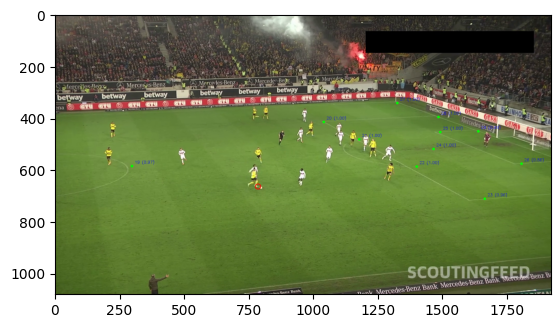

In [12]:
import centroid_track
import detection_utils
import keypoint_utils
importlib.reload(centroid_track)
importlib.reload(detection_utils)
importlib.reload(keypoint_utils)
keypoint_frames=keypoint_utils.draw_keypoints(all_keypoints,all_frames)
plt.figure()

plt.imshow(keypoint_frames[index_frame_number])
fr=keypoint_frames[index_frame_number]
frame_rgb=cv2.cvtColor(fr, cv2.COLOR_BGR2RGB) 
cv2.imwrite("keypoints_field.png",frame_rgb )

In [13]:
vert=CONFIG.vertices
print(vert)

[(0, 0), (0, 1450.0), (0, 2584.0), (0, 4416.0), (0, 5550.0), (0, 7000), (550, 2584.0), (550, 4416.0), (1100, 3500.0), (2015, 1450.0), (2015, 2584.0), (2015, 4416.0), (2015, 5550.0), (6000.0, 0), (6000.0, 2585.0), (6000.0, 4415.0), (6000.0, 7000), (9985, 1450.0), (9985, 2584.0), (9985, 4416.0), (9985, 5550.0), (10900, 3500.0), (11450, 2584.0), (11450, 4416.0), (12000, 0), (12000, 1450.0), (12000, 2584.0), (12000, 4416.0), (12000, 5550.0), (12000, 7000), (5085.0, 3500.0), (6915.0, 3500.0)]


In [44]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
import soccer_config
importlib.reload(soccer_config)
from soccer_config import SoccerPitchConfiguration
# Define the image size (in pixels)
img_width = 1200
img_height = 700

# Initialize soccer pitch configuration
pitch = SoccerPitchConfiguration()

# Create a blank image (white background)
img = np.ones((img_height, img_width, 3), dtype=np.uint8) * 255

# Define scaling factors based on physical dimensions
x_scale = img_width / pitch.length
y_scale = img_height / pitch.width

# Function to scale coordinates
def scale_coordinates(x, y):
    return int(x * x_scale), int(y * y_scale)

# List to store the scaled coordinates
scaled_coord = []

# Plot the vertices and edges
for idx, (x, y) in enumerate(pitch.vertices):
    x_scaled, y_scaled = scale_coordinates(x, y)
    print("The idx is: and its x y scaled is: ",idx,x,y)
    # Draw the vertex as a small circle
    cv2.circle(img, (x_scaled, y_scaled), 8, (0, 0, 0), -1)  # Black dot for the vertex
    # Annotate the point with label (if you need this step)
    cv2.putText(img, pitch.labels[idx], (x_scaled + 10, y_scaled + 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

    # Save the scaled coordinates
    scaled_coord.append((x_scaled, y_scaled))

# Plot the edges (lines connecting the vertices)
for edge in pitch.edges:
    # Get the start and end vertices of the edge
    x1, y1 = pitch.vertices[edge[0] - 1]
    x2, y2 = pitch.vertices[edge[1] - 1]
    
    # Scale the coordinates to image space
    x1_scaled, y1_scaled = scale_coordinates(x1, y1)
    x2_scaled, y2_scaled = scale_coordinates(x2, y2)
    
    # Draw the line between the two points (green color)
    cv2.line(img, (x1_scaled, y1_scaled), (x2_scaled, y2_scaled), (0, 255, 0), 2)  # Green color for edges

# Plot the center circle
center_x, center_y = pitch.length / 2, pitch.width / 2  # The center of the field
center_scaled_x, center_scaled_y = scale_coordinates(center_x, center_y)  # Scale to image coordinates
centre_circle_radius_scaled = pitch.centre_circle_radius * x_scale  # Scale the radius to match the image

# Draw the center circle
cv2.circle(img, (center_scaled_x, center_scaled_y), int(centre_circle_radius_scaled), (0, 255, 0), 2)  # Green circle

# Save the figure as an image file
cv2.imwrite("soccer_pitch_with_circle_scaled_cv2.png", img)


The idx is: and its x y scaled is:  0 0 0
The idx is: and its x y scaled is:  1 0 1450.0
The idx is: and its x y scaled is:  2 0 2584.0
The idx is: and its x y scaled is:  3 0 4416.0
The idx is: and its x y scaled is:  4 0 5550.0
The idx is: and its x y scaled is:  5 0 7000
The idx is: and its x y scaled is:  6 550 2584.0
The idx is: and its x y scaled is:  7 550 4416.0
The idx is: and its x y scaled is:  8 1100 3500.0
The idx is: and its x y scaled is:  9 2015 1450.0
The idx is: and its x y scaled is:  10 2015 2584.0
The idx is: and its x y scaled is:  11 2015 4416.0
The idx is: and its x y scaled is:  12 2015 5550.0
The idx is: and its x y scaled is:  13 6000.0 0
The idx is: and its x y scaled is:  14 6000.0 2585.0
The idx is: and its x y scaled is:  15 6000.0 4415.0
The idx is: and its x y scaled is:  16 6000.0 7000
The idx is: and its x y scaled is:  17 9985 1450.0
The idx is: and its x y scaled is:  18 9985 2584.0
The idx is: and its x y scaled is:  19 9985 4416.0
The idx is: and 

True

In [45]:
scaled_coord

[(0, 0),
 (0, 145),
 (0, 258),
 (0, 441),
 (0, 555),
 (0, 700),
 (55, 258),
 (55, 441),
 (110, 350),
 (201, 145),
 (201, 258),
 (201, 441),
 (201, 555),
 (600, 0),
 (600, 258),
 (600, 441),
 (600, 700),
 (998, 145),
 (998, 258),
 (998, 441),
 (998, 555),
 (1090, 350),
 (1145, 258),
 (1145, 441),
 (1200, 0),
 (1200, 145),
 (1200, 258),
 (1200, 441),
 (1200, 555),
 (1200, 700),
 (508, 350),
 (691, 350)]

In [49]:
labels=pitch.labels

In [ ]:
img=cv2.imread("soccer_pitch_with_circle_scaled_cv2.png")

In [50]:
# Create a mapping from labels to vertices
label_to_vertex = {label: vertex for label, vertex in zip(labels, scaled_coord)}

# Filter vertices based on the keypoints' classes
filtered_vertices = []
filtered_keypoints = []
kpts=all_keypoints[index_frame_number]
for kp in kpts:
    label = kp['class']
    if label in label_to_vertex:
        filtered_vertices.append(label_to_vertex[label])
        filtered_keypoints.append(kp['keypoints'])

# Output the results
print("Filtered Vertices:", filtered_vertices)
print("Filtered Keypoints:", filtered_keypoints)

final_vert_array=np.array(filtered_vertices)
final_kpts_array=np.array(filtered_keypoints)
transformer = Transform(
    source=final_kpts_array.astype(np.float32),
    target=final_vert_array.astype(np.float32)
)
pts_2d=position_array[index_frame_number].reshape(1, -1) 
pts_2d
final_img=transformer.transform_points(points=pts_2d)

Filtered Vertices: [(998, 145), (998, 258), (998, 441), (998, 555), (1090, 350), (1145, 258), (1145, 441), (1200, 0), (1200, 145), (1200, 258), (691, 350)]
Filtered Keypoints: [(1038.0, 416.0), (1175.0, 483.0), (1397.0, 588.0), (1660.0, 712.0), (1462.0, 520.0), (1488.0, 455.0), (1802.0, 577.0), (1322.0, 343.0), (1481.0, 397.0), (1635.0, 452.0), (297.0, 586.0)]


(700, 1200, 3)


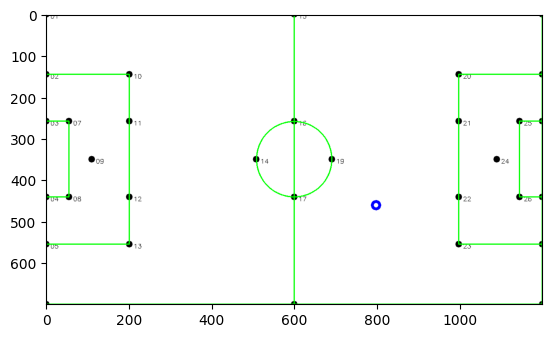

In [59]:

center = final_img[0] # Example center coordinates in (x, y)

# Define the radius of the circle
radius = 9  # You can adjust this value as needed

# Define the color of the circle (BGR format)
color = (0, 0, 255)  # Red color

# Define the thickness of the circle's border
thickness = 5  # If you want a filled circle, use -1 for thickness

# Draw the circle on the image
cv2.circle(img, center, radius, color, thickness)
plt.imshow(img)

In [146]:
img.shape

(1654, 2814, 3)

In [45]:
video_path = src

# Open the video file
cap = cv2.VideoCapture(video_path)
frame_nu=10
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_nu)

# Read the specific frame
success, frame = cap.read()
frame_rgb=cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) 

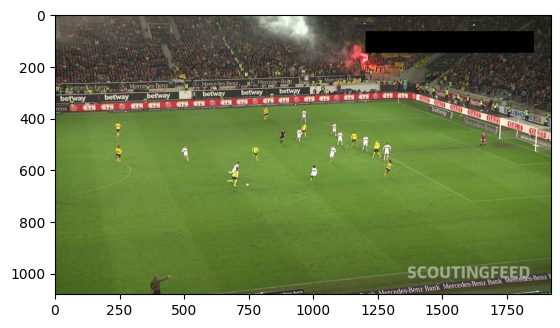

In [48]:
plt.imshow(frame_rgb)